## Import All Module And Packages

In [782]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve,  cross_val_score,GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier







## Data Loading

In [783]:
columns = [
    "age",        # usia
    "sex",        # 1 = pria, 0 = wanita
    "cp",         # chest pain type (1–4) 1: "typical angina", 2: "atypical angina", 3: "non-anginal pain", 4: "asymptomatic"
    "trestbps",   # resting blood pressure
    "chol",       # serum cholesterol (mg/dl)
    "fbs",        # fasting blood sugar > 120 mg/dl 1 = yes, 0 = no
    "restecg",    # resting electrocardiographic results  0: "normal", 1: "ST-T abnormality", 2: "LV hypertrophy",
    "thalach",    # maximum heart rate achieved
    "exang",      # exercise induced angina 1: "yes", 0: "no",
    "oldpeak",    # ST depression induced by exercise
    "slope",      # slope of the peak exercise ST segment 1: "upsloping", 2: "flat", 3: "downsloping"
    "ca",         # number of major vessels (0–3) colored by fluoroscopy
    "thal",       # 3 = normal, 6 = fixed defect, 7 = reversable defect
    "target"      # diagnosis of heart disease (0 = no, 1–4 = yes)
]

numerical_col = ["age","trestbps", "chol", "thalach", "oldpeak", "ca"]
categorical_col = [ "sex", "cp", "fbs", "restecg", "exang", "slope", "thal","target","region"]

df_cland = pd.read_csv("./heart+disease/processed.cleveland.data", header=None, names=columns)
df_cland["region"] = "Cleveland"

df_hrian = pd.read_csv("./heart+disease/reprocessed.hungarian.data", header=None, names=columns)
df_hrian["region"] = "Hungarian"

df_swit = pd.read_csv("./heart+disease/processed.switzerland.data", header=None, names=columns)
df_swit["region"] = "Switzerland"

df_va = pd.read_csv("./heart+disease/processed.va.data", header=None, names=columns)
df_va["region"] = "Va"


In [784]:
df = pd.concat([df_cland, df_hrian, df_swit, df_va], ignore_index=True)

In [785]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,region
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,Cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0,Cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,Cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,Cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,Cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0.0,4.0,127,333,1,1,154,0,0,?,?,?,1.0,Va
916,62,1.0,1.0,?,139,0,1,?,?,?,?,?,?,0.0,Va
917,55,1.0,4.0,122,223,1,1,100,0,0,?,?,6,2.0,Va
918,58,1.0,4.0,?,385,1,2,?,?,?,?,?,?,0.0,Va


In [786]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    object 
 1   sex       626 non-null    float64
 2   cp        626 non-null    float64
 3   trestbps  626 non-null    object 
 4   chol      626 non-null    object 
 5   fbs       626 non-null    object 
 6   restecg   626 non-null    object 
 7   thalach   626 non-null    object 
 8   exang     626 non-null    object 
 9   oldpeak   626 non-null    object 
 10  slope     626 non-null    object 
 11  ca        626 non-null    object 
 12  thal      626 non-null    object 
 13  target    626 non-null    float64
 14  region    920 non-null    object 
dtypes: float64(3), object(12)
memory usage: 107.9+ KB


In [787]:
df.describe()

,sex,cp,target
count,626.000000,626.000000,626.000000
mean,0.819489,3.375399,1.293930
std,0.384920,0.887947,1.238009
min,0.000000,1.000000,0.000000
25%,1.000000,3.000000,0.000000
50%,1.000000,4.000000,1.000000
75%,1.000000,4.000000,2.000000
max,1.000000,4.000000,4.000000


## Data Cleaning

In [788]:
df.replace("?",np.nan, inplace=True)

In [789]:
df.isna().sum()

age           0
sex         294
cp          294
trestbps    352
chol        301
fbs         376
restecg     295
thalach     348
exang       348
oldpeak     356
slope       413
ca          614
thal        514
target      294
region        0
dtype: int64

In [790]:
df.replace("?", np.nan, inplace=True)
df[numerical_col] = df[numerical_col].apply(pd.to_numeric, errors='coerce')
df[categorical_col] = df[categorical_col].astype('object')

In [791]:
df.dropna(inplace=True)

In [792]:
df.drop_duplicates(inplace=True)

In [793]:
mapping = {
    "sex": {1: "male", 0: "female"},
    "cp": {1: "typical angina", 2: "atypical angina", 3: "non-anginal pain", 4: "asymptomatic"},
    "fbs": {1: "true", 0: "false", "1":"true", "0":"false"},
    "restecg": {0: "normal", 1: "ST-T abnormality", 2: "LV hypertrophy"},
    "exang": {1: "yes", 0: "no", "1":"yes", "0":"no"},
    "slope": {1: "upsloping", 2: "flat", 3: "downsloping", "1": "upsloping", "2": "flat", "3": "downsloping"},
    "thal": {3: "normal", 6: "fixed defect", 7: "reversible defect", "3.0":"normal","6.0":"fixed defect", "7.0":"reversible defect", "3":"normal","6":"fixed defect", "7":"reversible defect"},
    "target":{0: "0", 1:"1",2:"1", 3:"1", 4:"1"}
}

df.replace(mapping, inplace=True)


In [794]:
df.shape

(298, 15)

In [795]:
df.describe()


,age,trestbps,chol,thalach,oldpeak,ca
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.546980,131.654362,246.855705,149.500000,1.057047,0.674497
std,9.034882,17.745811,52.607075,22.967002,1.164443,0.938202
min,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,242.500000,152.500000,0.800000,0.000000
75%,61.000000,140.000000,275.750000,165.750000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [796]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 748
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       298 non-null    float64
 1   sex       298 non-null    object 
 2   cp        298 non-null    object 
 3   trestbps  298 non-null    float64
 4   chol      298 non-null    float64
 5   fbs       298 non-null    object 
 6   restecg   298 non-null    object 
 7   thalach   298 non-null    float64
 8   exang     298 non-null    object 
 9   oldpeak   298 non-null    float64
 10  slope     298 non-null    object 
 11  ca        298 non-null    float64
 12  thal      298 non-null    object 
 13  target    298 non-null    object 
 14  region    298 non-null    object 
dtypes: float64(6), object(9)
memory usage: 37.2+ KB


In [797]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,region
0,63.0,male,typical angina,145.0,233.0,true,LV hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect,0,Cleveland
1,67.0,male,asymptomatic,160.0,286.0,false,LV hypertrophy,108.0,yes,1.5,flat,3.0,normal,1,Cleveland
2,67.0,male,asymptomatic,120.0,229.0,false,LV hypertrophy,129.0,yes,2.6,flat,2.0,reversible defect,1,Cleveland
3,37.0,male,non-anginal pain,130.0,250.0,false,normal,187.0,no,3.5,downsloping,0.0,normal,0,Cleveland
4,41.0,female,atypical angina,130.0,204.0,false,LV hypertrophy,172.0,no,1.4,upsloping,0.0,normal,0,Cleveland


## EDA Explanatory Data Analysis

### Univariate Analysis

<Figure size 2000x800 with 0 Axes>

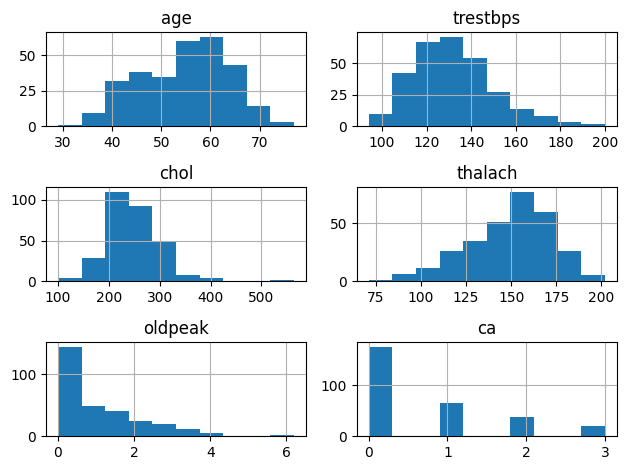

In [798]:
plt.figure(figsize=(20,8))
df.hist()
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_18148\325512691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df["target"], palette="Set2" )


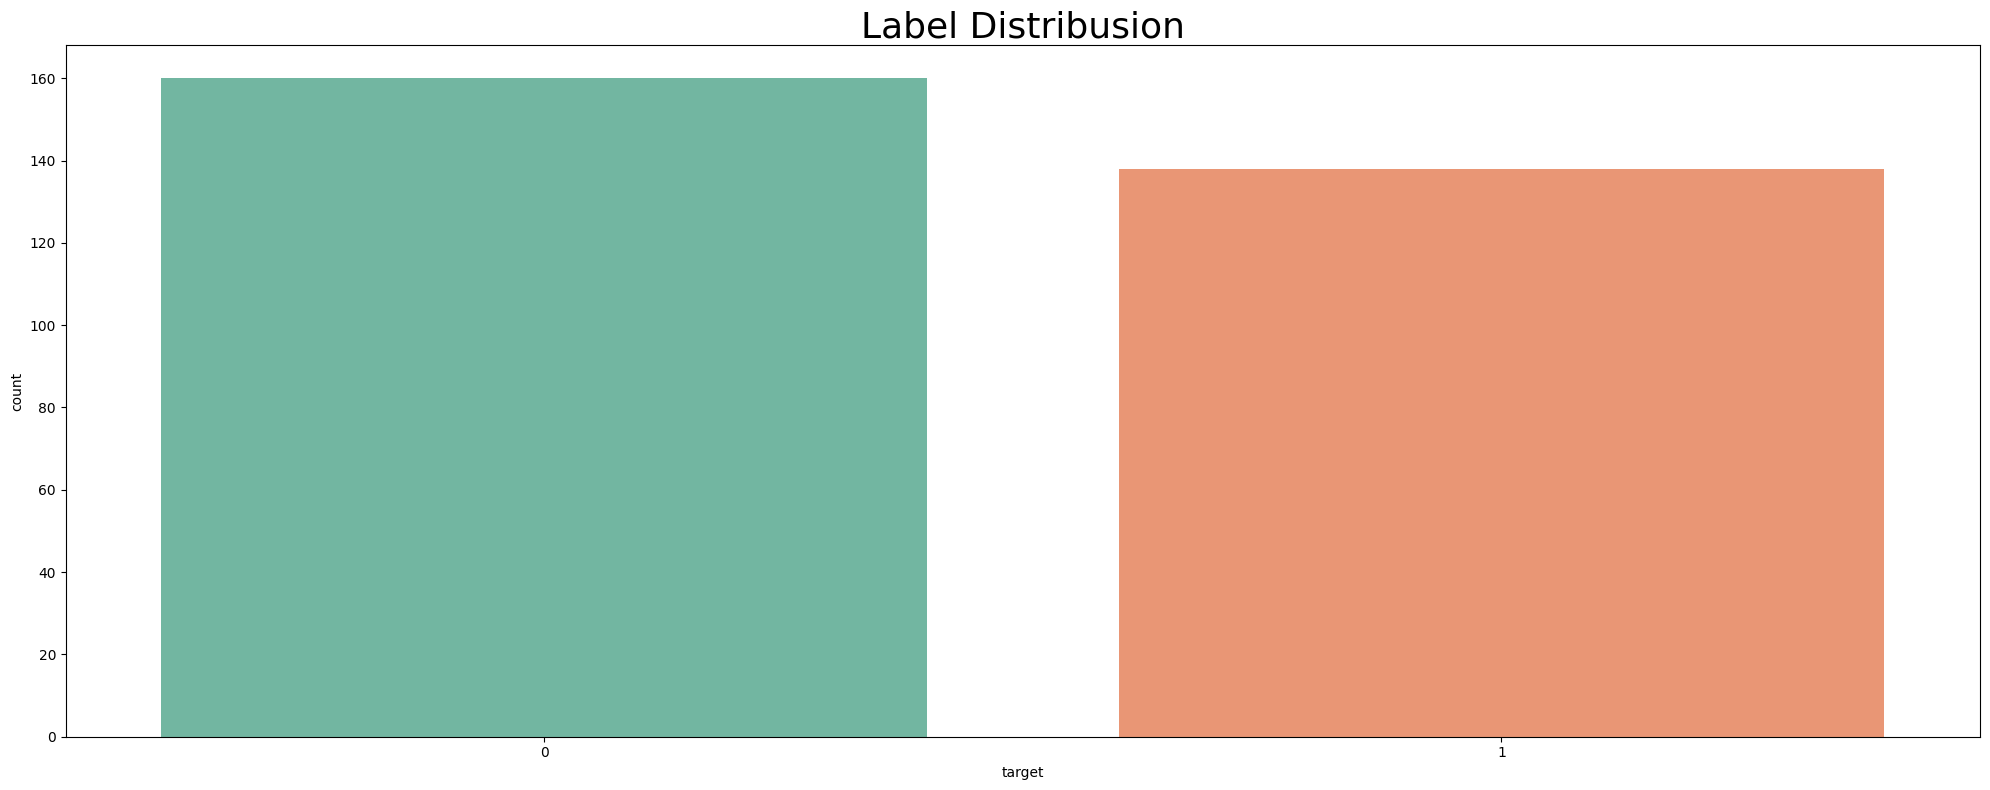

In [799]:
plt.figure(figsize=(20,8))
sns.countplot(x= df["target"], palette="Set2" )
plt.title("Label Distribusion", fontsize=26)
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_18148\3251772335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df["region"], palette="Set2" )


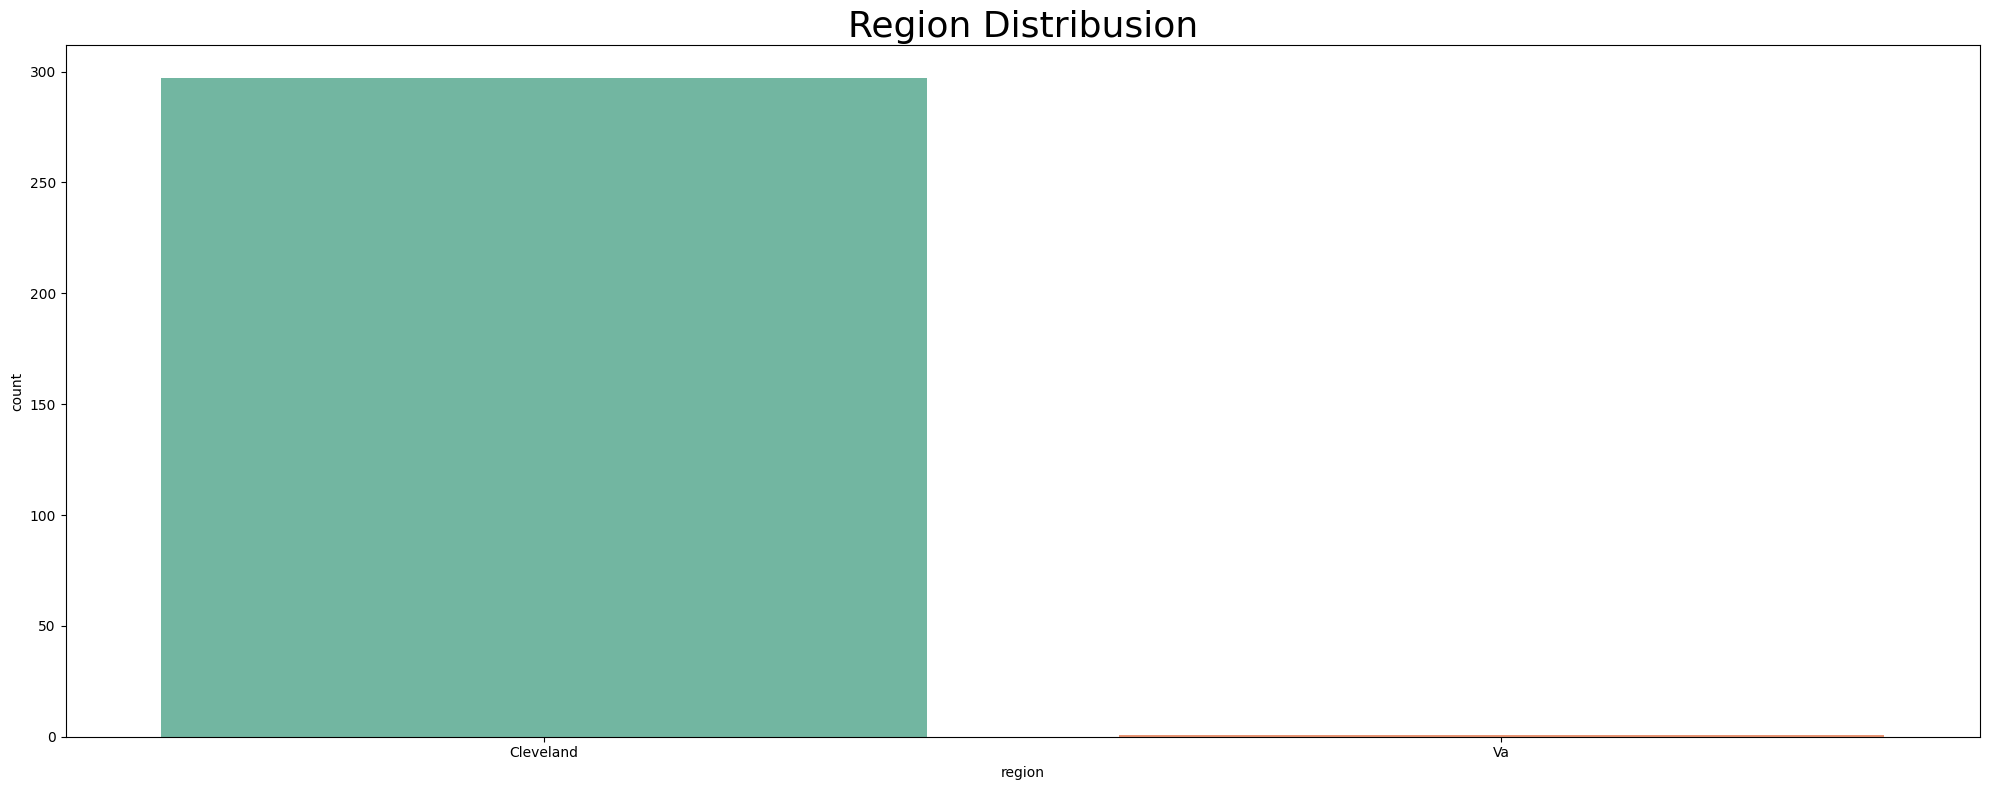

In [800]:
plt.figure(figsize=(20,8))
sns.countplot(x= df["region"], palette="Set2" )
plt.title("Region Distribusion", fontsize=26)
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_18148\2437240458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df["sex"], palette="Set2" )


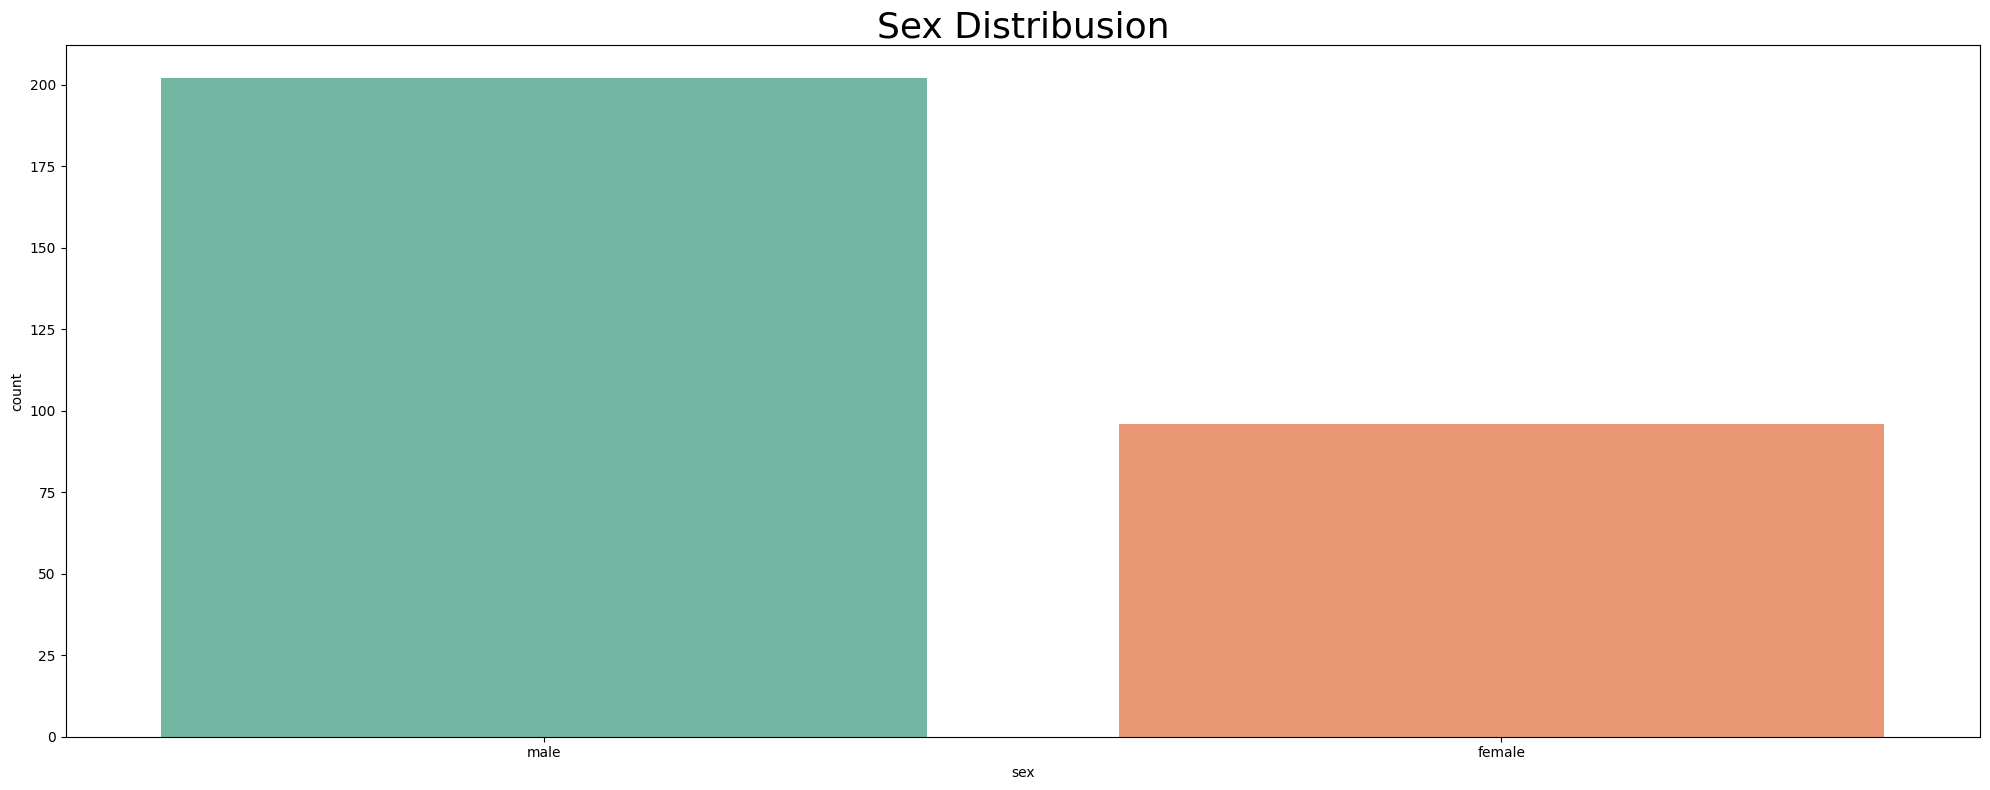

In [801]:
plt.figure(figsize=(20,8))
sns.countplot(x= df["sex"], palette="Set2" )
plt.title("Sex Distribusion", fontsize=26)
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_18148\219975454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df["cp"], palette="Set2" )


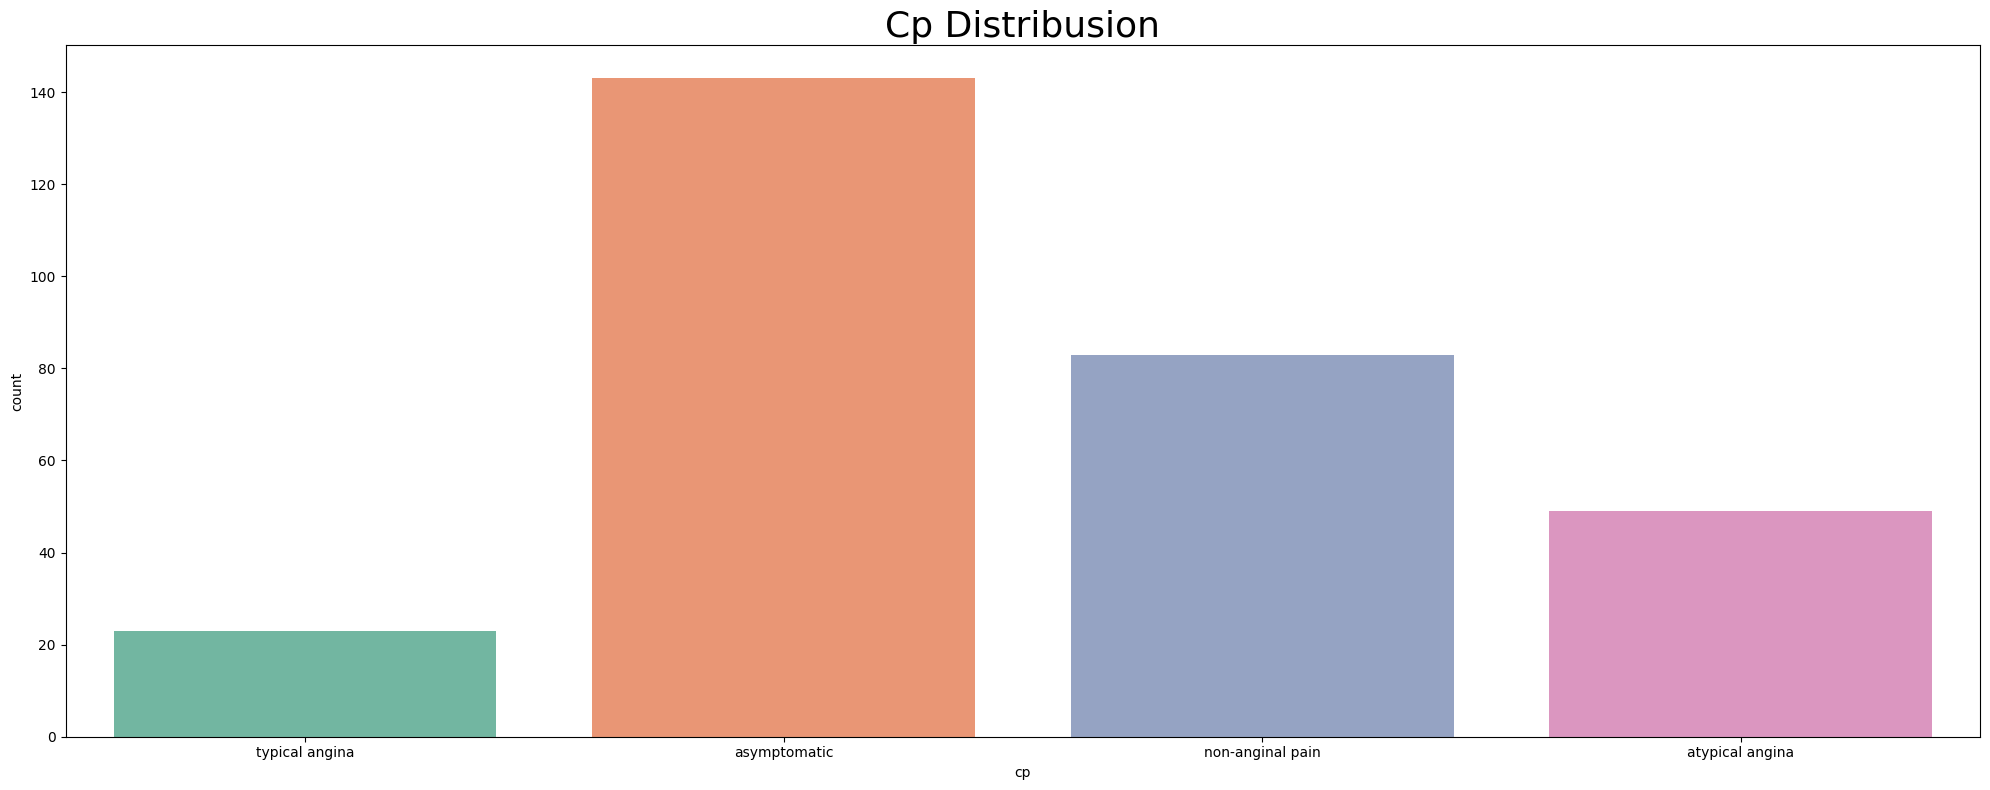

In [802]:
plt.figure(figsize=(20,8))
sns.countplot(x= df["cp"], palette="Set2" )
plt.title("Cp Distribusion", fontsize=26)
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_18148\2484172946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df["slope"], palette="Set2" )


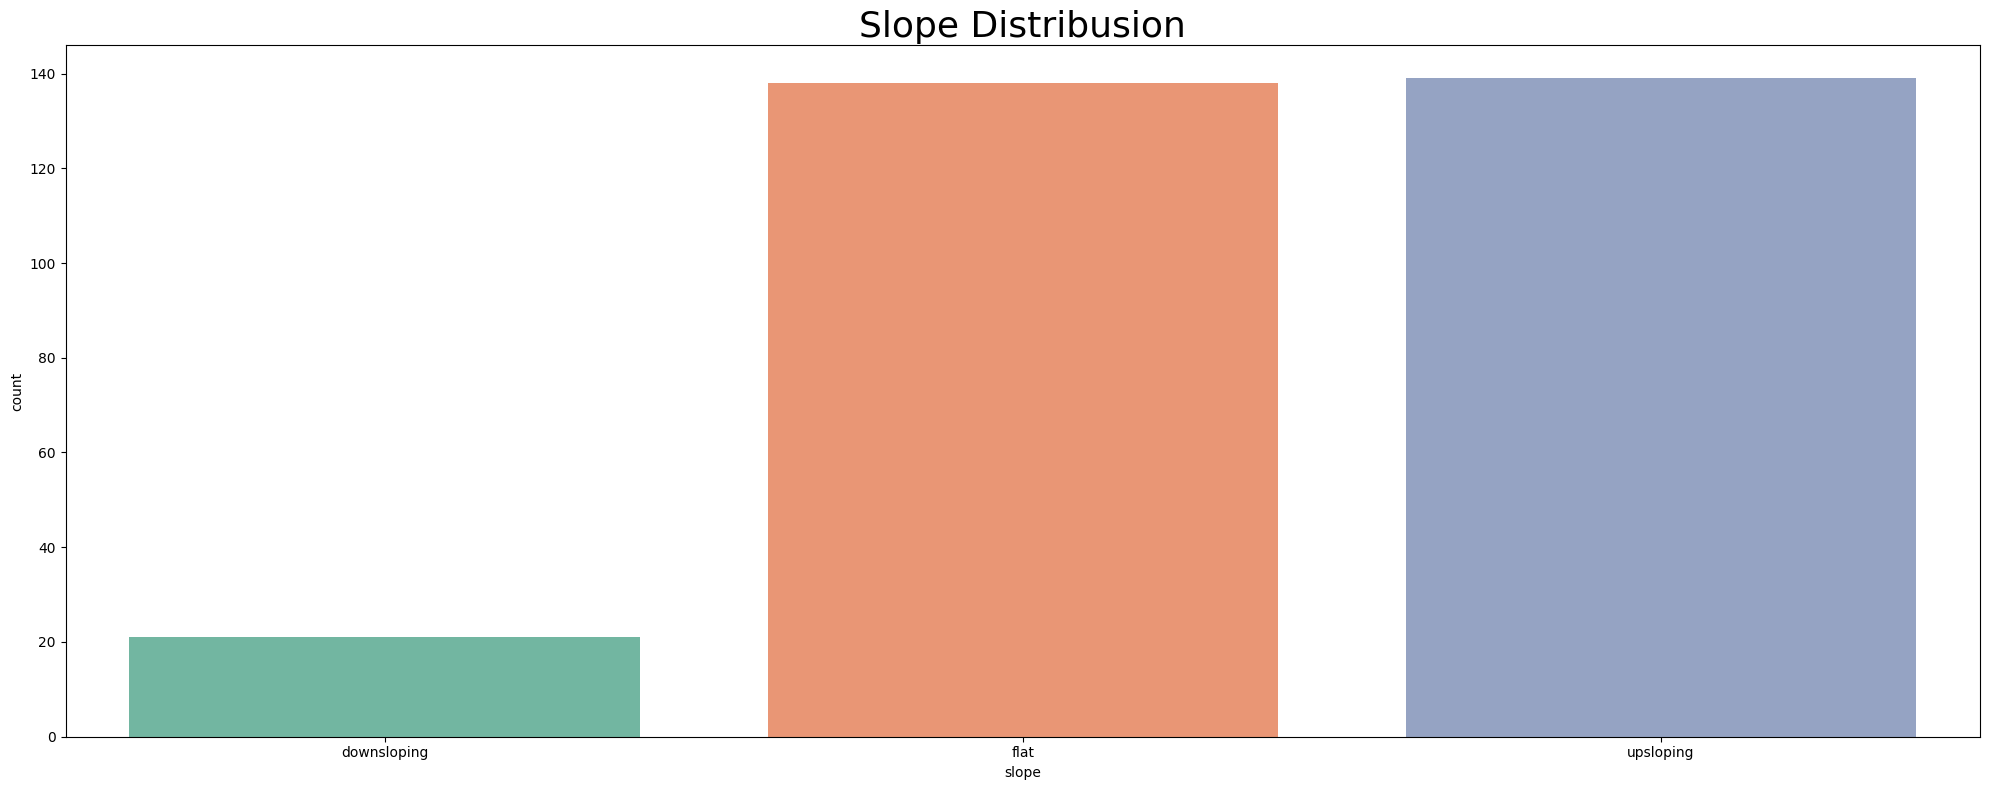

In [803]:
plt.figure(figsize=(20,8))
sns.countplot(x= df["slope"], palette="Set2" )
plt.title("Slope Distribusion", fontsize=26)
plt.tight_layout()
plt.show()

### Bivariate & MultiVariate Analysis

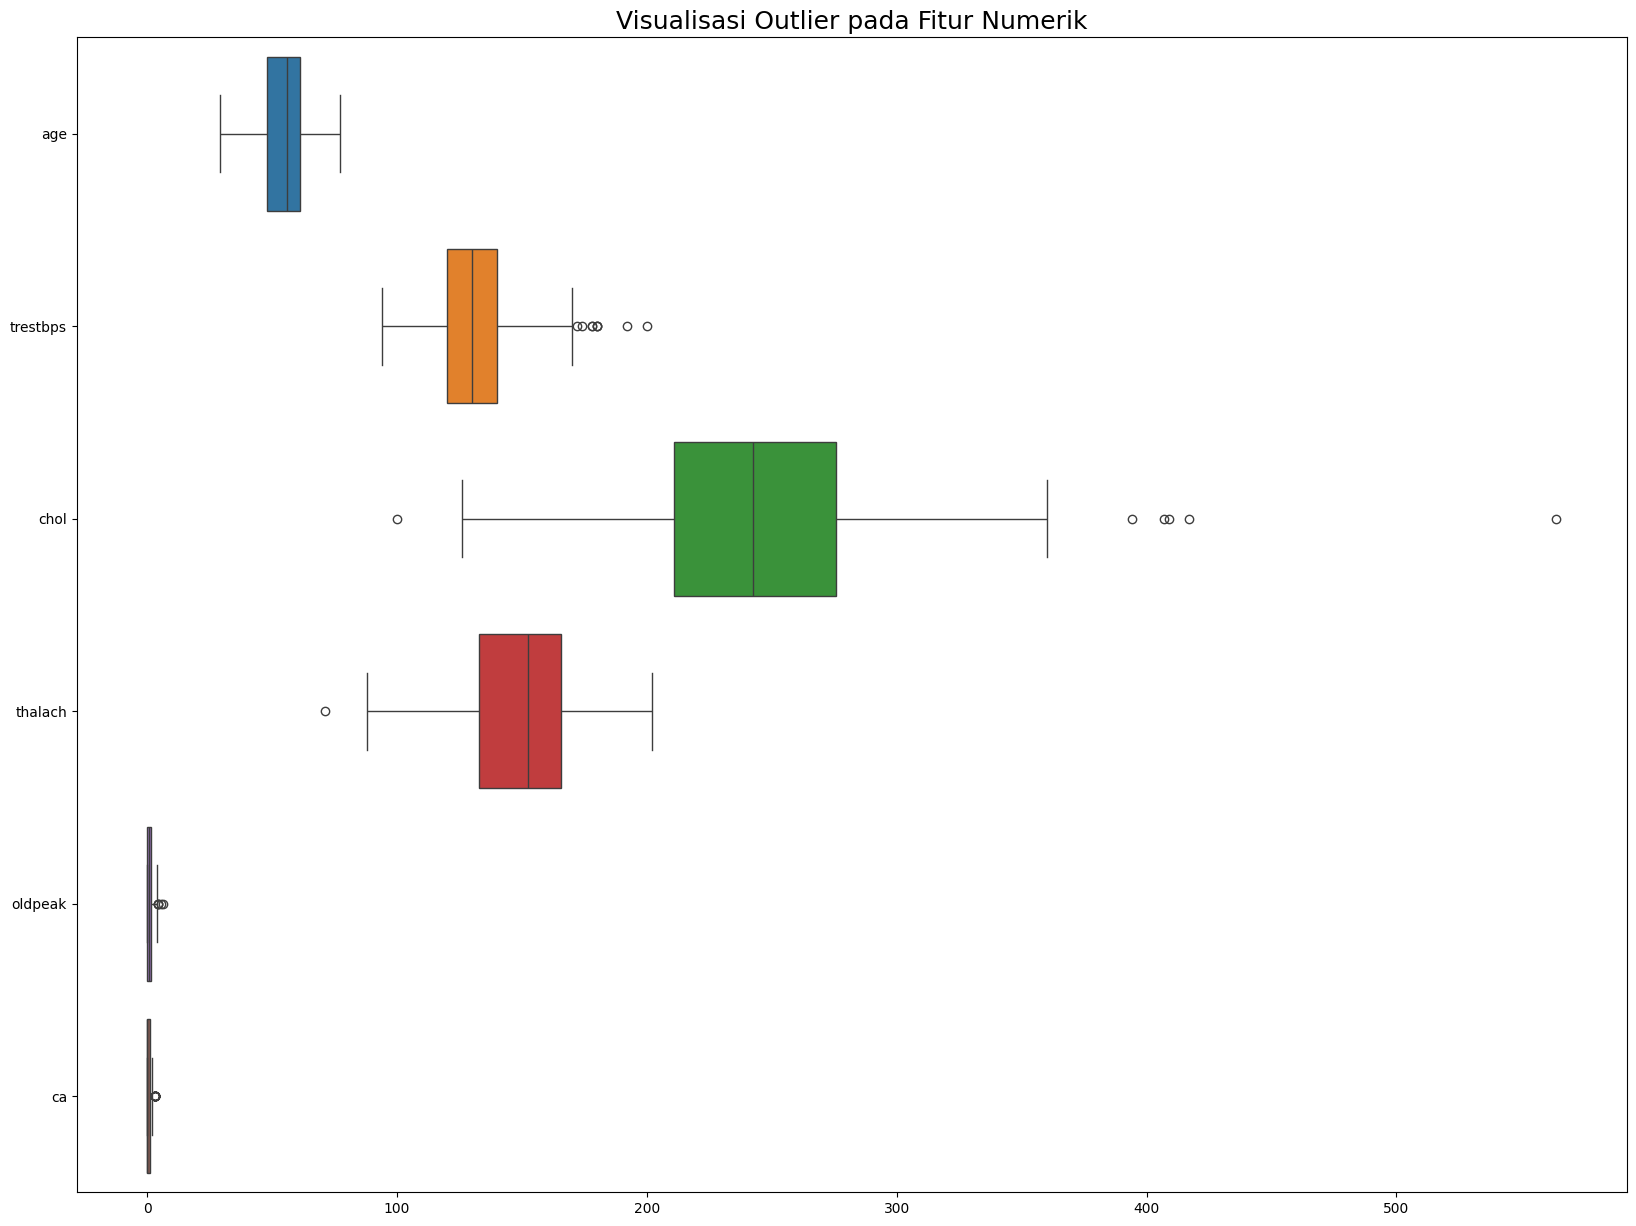

In [804]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df[numerical_col], orient="h")
plt.title("Visualisasi Outlier pada Fitur Numerik", fontsize=18)
plt.yticks(rotation=0)
plt.show()

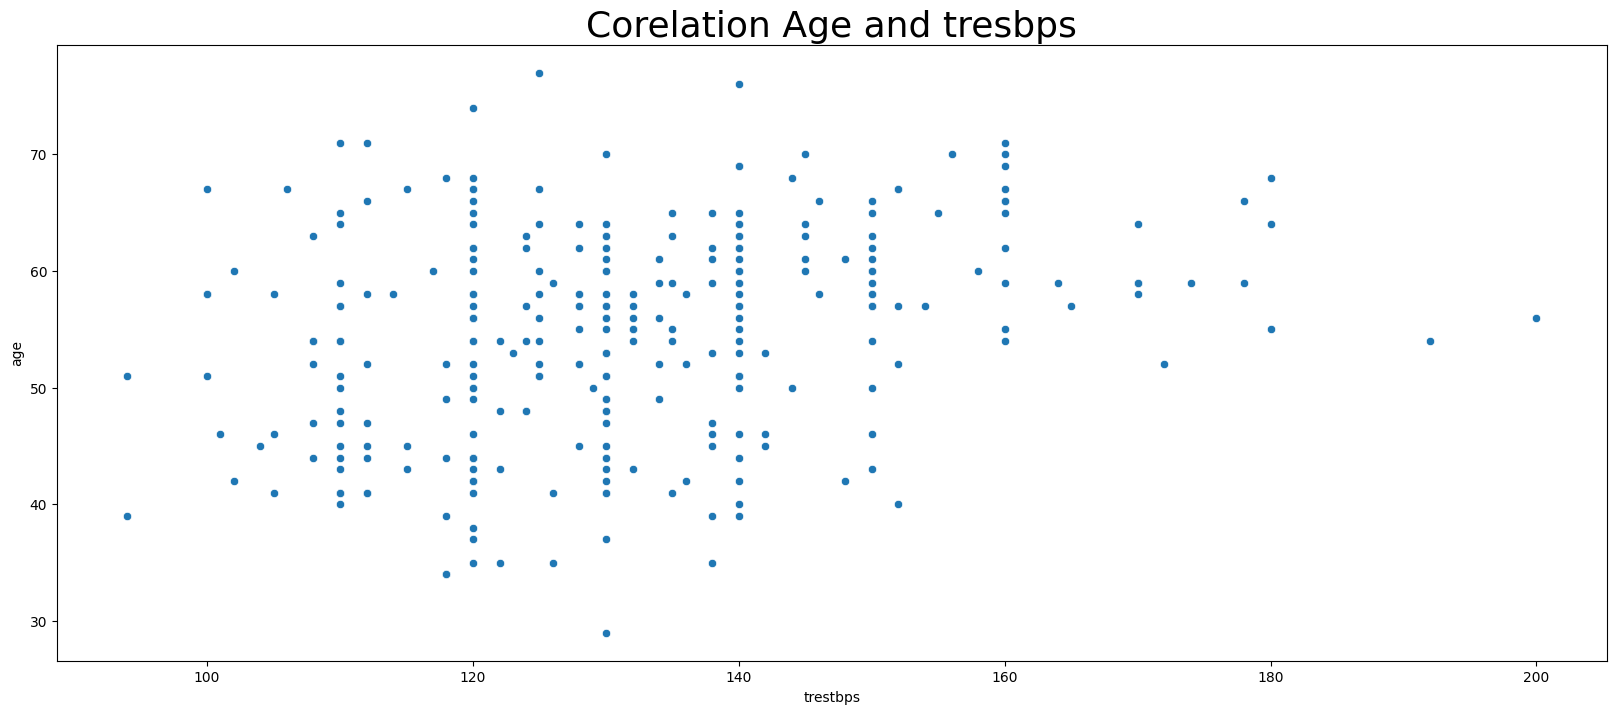

In [805]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df["trestbps"], y=df["age"])
plt.title("Corelation Age and tresbps", fontsize=26)
plt.show()

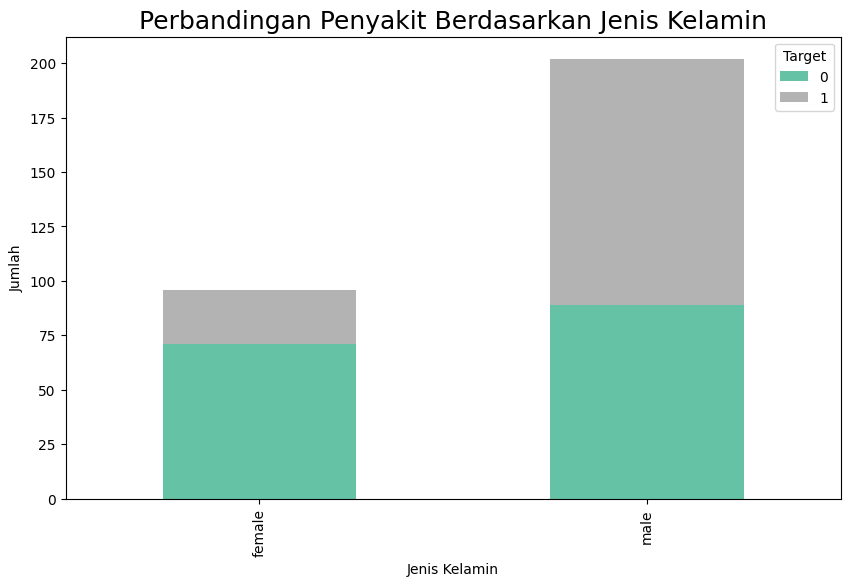

In [806]:
pivot_df = df.pivot_table(index='sex', columns='target', aggfunc='size', fill_value=0)

pivot_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Perbandingan Penyakit Berdasarkan Jenis Kelamin", fontsize=18)
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.legend(title="Target")
plt.show()


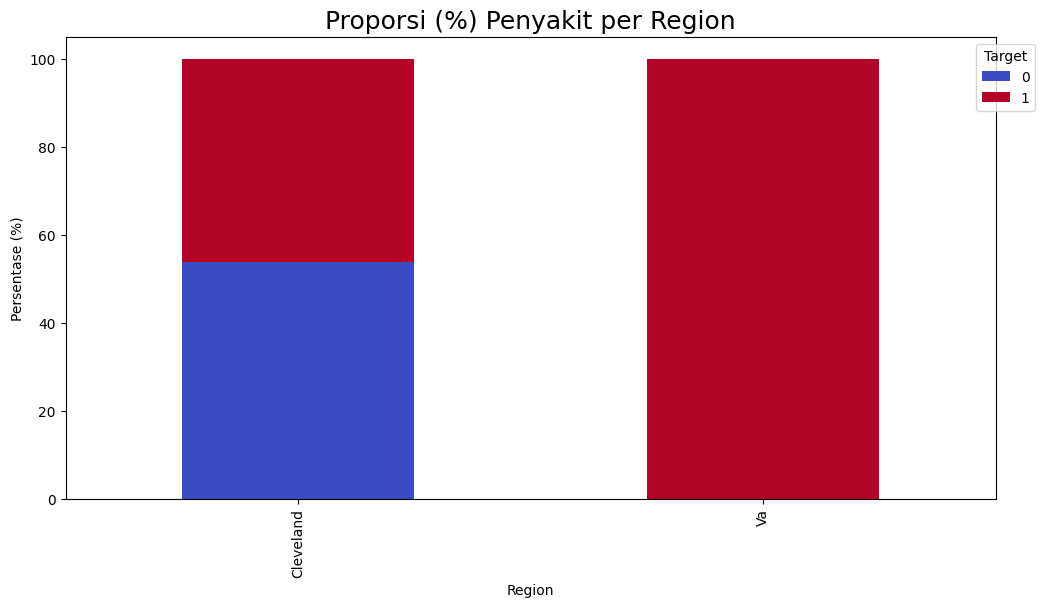

In [807]:
pivot_df = df.pivot_table(index='region', columns='target', aggfunc='size', fill_value=0)

# ubah ke persentase
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

pivot_df_percent.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Proporsi (%) Penyakit per Region", fontsize=18)
plt.xlabel("Region")
plt.ylabel("Persentase (%)")
plt.legend(title="Target", bbox_to_anchor=(1.05, 1))
plt.show()


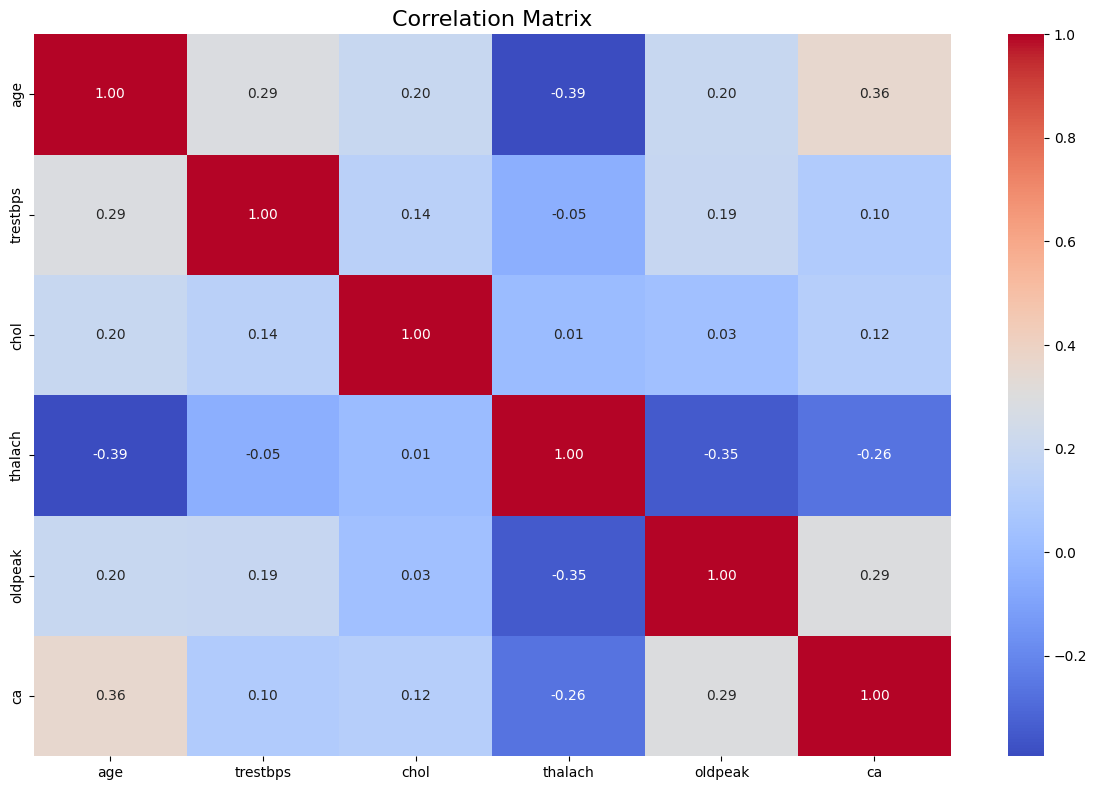

In [808]:
corr = df[numerical_col].corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

### Data Preprocessing

In [809]:

df_no_outlier = df.copy()


# Loop tiap kolom numerik
for col in df_no_outlier[numerical_col].columns:
    Q1 = df_no_outlier[col].quantile(0.25)
    Q3 = df_no_outlier[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter data, hapus outlier
    df_no_outlier = df_no_outlier[(df_no_outlier[col] >= lower) & (df_no_outlier[col] <= upper)]

print("Shape sebelum:", df.shape)
print("Shape sesudah:", df_no_outlier.shape)

df_no_outlier.reset_index(inplace=True)


Shape sebelum: (298, 15)
Shape sesudah: (262, 15)


In [810]:
processed_df = df_no_outlier
Scaler = MinMaxScaler()
Scaler.fit(df_no_outlier[numerical_col])
processed_df[numerical_col] = Scaler.transform(processed_df[numerical_col])
joblib.dump(Scaler, "./Pkl/Scaler.pkl")

encoder = {}
for col in categorical_col:
    Encoder = LabelEncoder()
    processed_df[col] = Encoder.fit_transform(processed_df[col])
    encoder[col] = Encoder
    joblib.dump(Encoder,  f"./Pkl/Le{col}.pkl")

In [811]:
le_target = encoder["target"]

for original, encoded in zip(le_target.classes_, range(len(le_target.classes_))):
    print(f"{original} -> {encoded}")

0 -> 0
1 -> 1


In [812]:
processed_df

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,region
0,0,0.723404,1,3,0.671053,0.457265,1,0,0.543860,0,0.575,0,0.0,0,0,0
1,2,0.808511,1,0,0.342105,0.440171,0,0,0.359649,1,0.650,1,1.0,2,1,0
2,3,0.170213,1,2,0.473684,0.529915,0,2,0.868421,0,0.875,0,0.0,1,0,0
3,4,0.255319,0,1,0.473684,0.333333,0,0,0.736842,0,0.350,2,0.0,1,0,0
4,5,0.574468,1,1,0.342105,0.470085,0,2,0.789474,0,0.200,2,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,297,0.595745,0,0,0.605263,0.491453,0,2,0.307018,1,0.050,1,0.0,2,1,0
258,298,0.340426,1,3,0.210526,0.589744,0,2,0.385965,0,0.300,1,0.0,2,1,0
259,299,0.829787,1,0,0.657895,0.286325,1,2,0.464912,0,0.850,1,1.0,2,1,0
260,300,0.595745,1,0,0.473684,0.021368,0,2,0.236842,1,0.300,1,0.5,2,1,0


In [813]:
X = processed_df.drop(columns=["target","region","index"])
y = processed_df["target"]

In [814]:
X_train,X_test, y_train, y_test = train_test_split(X,y)


In [815]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [816]:
y_train_res.value_counts()

target
0    120
1    120
Name: count, dtype: int64

## Modeling

In [817]:
#random forest
rf = BalancedRandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    bootstrap=False,
    min_samples_split=8,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train_res, y_train_res)


# K-Nearest Neighbors
knn = KNeighborsClassifier(
    n_neighbors=3,   
    weights='uniform',
    metric='minkowski',
    n_jobs=-1
)
knn.fit(X_train_res, y_train_res)



# Logistic Regression
log_reg = LogisticRegression(
    solver='lbfgs',         
    max_iter=1000,         
    random_state=42,
    class_weight='balanced'  
)
log_reg.fit(X_train_res, y_train_res)



#  XGBoost Classifier
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',  
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train_res, y_train_res)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [825]:
rf.feature_names_in_


array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [818]:
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5, scoring='f1_macro'):
    """
    Evaluasi menyeluruh untuk model klasifikasi.
    
    Params:
    - model: estimator (misal RandomForestClassifier)
    - X_train, y_train: data latih (boleh hasil oversampling)
    - X_test, y_test: data uji asli
    - cv: jumlah fold cross-validation
    - scoring: metric utama untuk cross_val_score
    
    Output:
    - Plot learning curve
    - Classification report & confusion matrix
    - Cross-validation score
    """

    # 1️⃣ Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1
    )

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train', linewidth=2)
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test', linewidth=2)
    plt.xlabel("Training samples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve: Overfit Checker")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # 2️⃣ Evaluation on Test Set
    y_pred = model.predict(X_test)
    print("🔹 Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"✅ F1 Score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(f"✅ F1 Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")

    # 3️⃣ Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # 4️⃣ Cross-validation
    acc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)

    print(f"\n🔹 Cross-validation Results ({cv}-fold):")
    print(f"   Mean Accuracy: {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
    print(f"   Mean {scoring.upper()}: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")

Random Forest model evaluation


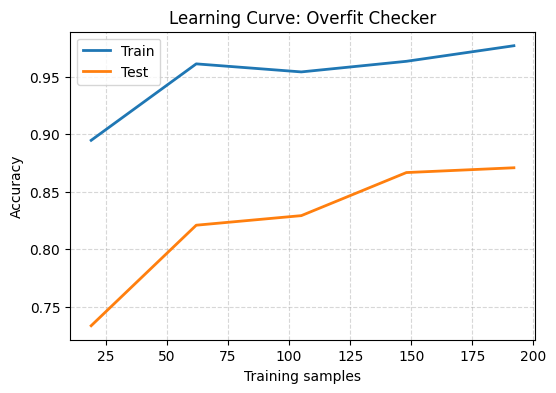

🔹 Classification Report:
              precision    recall  f1-score   support

           0      0.781     0.806     0.794        31
           1      0.824     0.800     0.812        35

    accuracy                          0.803        66
   macro avg      0.802     0.803     0.803        66
weighted avg      0.804     0.803     0.803        66

✅ Accuracy: 0.8030
✅ F1 Score (macro): 0.8026
✅ F1 Score (weighted): 0.8032


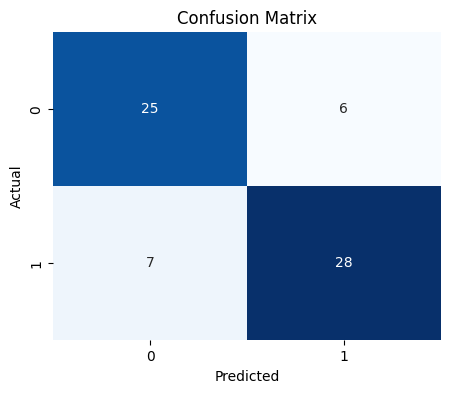


🔹 Cross-validation Results (5-fold):
   Mean Accuracy: 0.8708 ± 0.0306
   Mean F1_MACRO: 0.8700 ± 0.0310


In [819]:
print("Random Forest model evaluation")
evaluate_model(
    rf, 
    X_train_res, y_train_res,  
    X_test, y_test,           
    cv=5
)

Knearest Neigtbors model evaluation


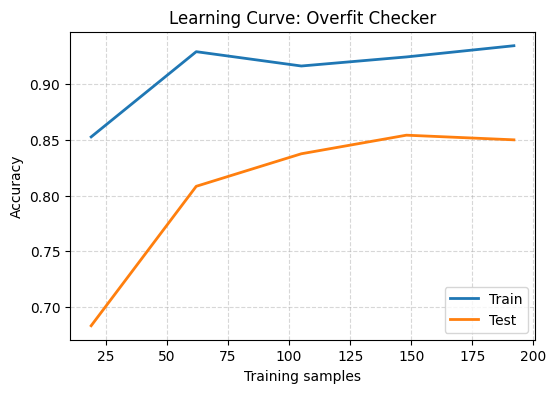

🔹 Classification Report:
              precision    recall  f1-score   support

           0      0.657     0.742     0.697        31
           1      0.742     0.657     0.697        35

    accuracy                          0.697        66
   macro avg      0.700     0.700     0.697        66
weighted avg      0.702     0.697     0.697        66

✅ Accuracy: 0.6970
✅ F1 Score (macro): 0.6970
✅ F1 Score (weighted): 0.6970


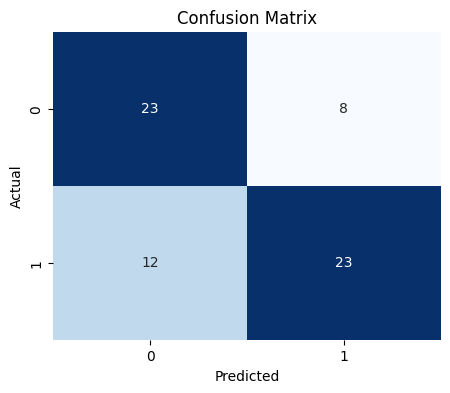


🔹 Cross-validation Results (5-fold):
   Mean Accuracy: 0.8500 ± 0.0610
   Mean F1_MACRO: 0.8492 ± 0.0614


In [820]:
print("Knearest Neigtbors model evaluation")
evaluate_model(
    knn, 
    X_train_res, y_train_res,  
    X_test, y_test,           
    cv=5
)

Logistic Regression model evaluation


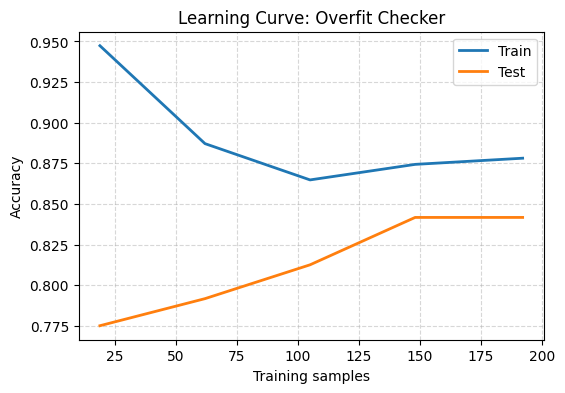

🔹 Classification Report:
              precision    recall  f1-score   support

           0      0.771     0.871     0.818        31
           1      0.871     0.771     0.818        35

    accuracy                          0.818        66
   macro avg      0.821     0.821     0.818        66
weighted avg      0.824     0.818     0.818        66

✅ Accuracy: 0.8182
✅ F1 Score (macro): 0.8182
✅ F1 Score (weighted): 0.8182


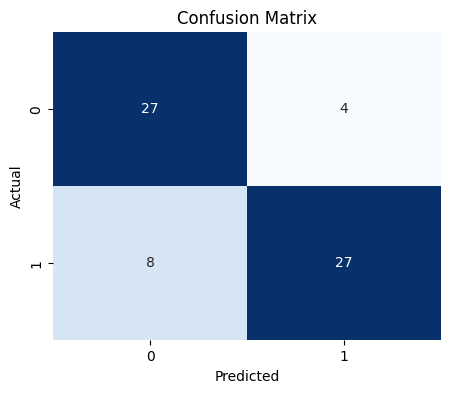


🔹 Cross-validation Results (5-fold):
   Mean Accuracy: 0.8417 ± 0.0212
   Mean F1_MACRO: 0.8410 ± 0.0214


In [821]:
print("Logistic Regression model evaluation")
evaluate_model(
    log_reg, 
    X_train_res, y_train_res,  
    X_test, y_test,           
    cv=5
)

Xgboost model evaluation


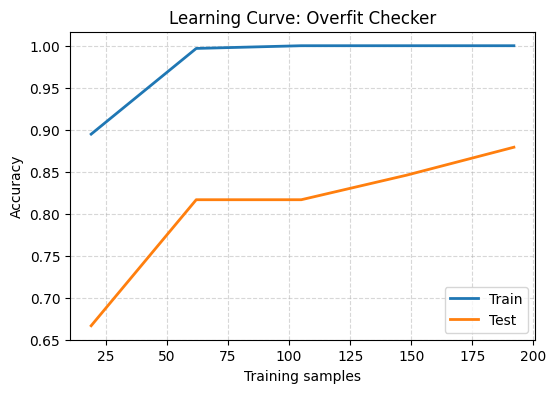

🔹 Classification Report:
              precision    recall  f1-score   support

           0      0.806     0.806     0.806        31
           1      0.829     0.829     0.829        35

    accuracy                          0.818        66
   macro avg      0.818     0.818     0.818        66
weighted avg      0.818     0.818     0.818        66

✅ Accuracy: 0.8182
✅ F1 Score (macro): 0.8175
✅ F1 Score (weighted): 0.8182


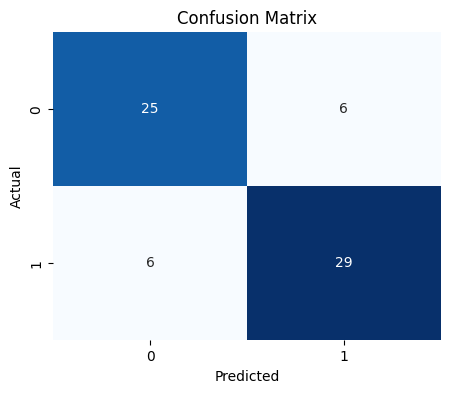


🔹 Cross-validation Results (5-fold):
   Mean Accuracy: 0.8875 ± 0.0583
   Mean F1_MACRO: 0.8868 ± 0.0594


In [822]:
print("Xgboost model evaluation")
evaluate_model(
    xgb, 
    X_train_res, y_train_res,  
    X_test, y_test,           
    cv=5
)

In [823]:
# --- grid search untuk semua model ---
def grid_search_all_models(models, param_grids, X_train, y_train, X_test, y_test):
    best_models = {}
    best_scores = {}

    for name, model in models.items():
        print(f"\n🔍 Melakukan Grid Search untuk {name} ...")
        grid_search = GridSearchCV(
            model, param_grids[name], cv=5, scoring="f1_weighted", n_jobs=-1, verbose=2
        )
        grid_search.fit(X_train, y_train)

        print(f"✅ Best params untuk {name}: {grid_search.best_params_}")
        print(f"✅ Best F1 score (CV): {grid_search.best_score_:.4f}")

        best_model = grid_search.best_estimator_
        best_models[name] = best_model
        best_scores[name] = grid_search.best_score_

        # evaluasi di test set
        print(f"\n📊 Evaluasi {name}")
        evaluate_model(best_model, X_train_res, y_train_res, X_test, y_test, cv=5)

        # simpan best model
        filename = f"./best_model/best_model_{name}.joblib"
        joblib.dump(best_model, filename)
        print(f"💾 Model terbaik {name} disimpan sebagai '{filename}'")

    # tampilkan model terbaik di antara semuanya
    overall_best = max(best_scores, key=best_scores.get)
    print("\n🏆 Model terbaik keseluruhan:")
    print(f"{overall_best} dengan skor F1 (CV): {best_scores[overall_best]:.4f}")
    print(f"Disimpan sebagai: best_model_{overall_best}.joblib")

    return best_models, best_scores


🔍 Melakukan Grid Search untuk RandomForest ...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
✅ Best params untuk RandomForest: {'bootstrap': False, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 400}
✅ Best F1 score (CV): 0.8868

📊 Evaluasi RandomForest


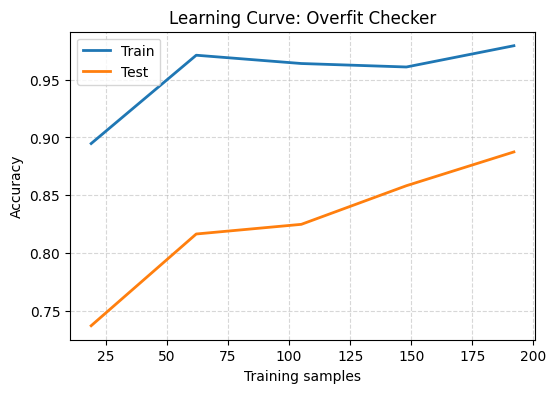

🔹 Classification Report:
              precision    recall  f1-score   support

           0      0.771     0.871     0.818        31
           1      0.871     0.771     0.818        35

    accuracy                          0.818        66
   macro avg      0.821     0.821     0.818        66
weighted avg      0.824     0.818     0.818        66

✅ Accuracy: 0.8182
✅ F1 Score (macro): 0.8182
✅ F1 Score (weighted): 0.8182


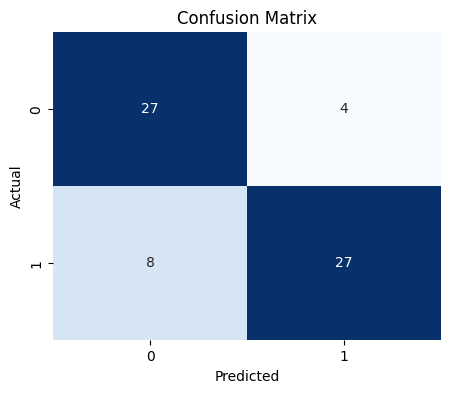


🔹 Cross-validation Results (5-fold):
   Mean Accuracy: 0.8875 ± 0.0486
   Mean F1_MACRO: 0.8868 ± 0.0491
💾 Model terbaik RandomForest disimpan sebagai './best_model/best_model_RandomForest.joblib'

🔍 Melakukan Grid Search untuk KNN ...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ Best params untuk KNN: {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
✅ Best F1 score (CV): 0.8622

📊 Evaluasi KNN


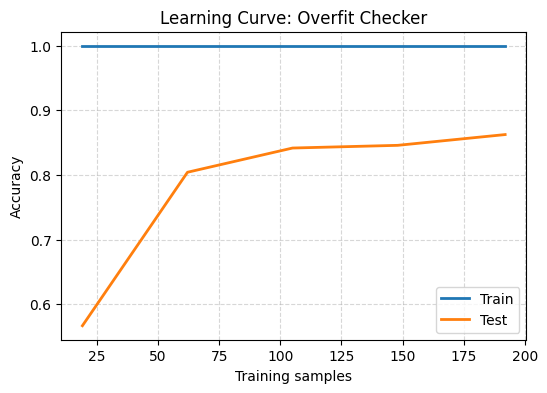

🔹 Classification Report:
              precision    recall  f1-score   support

           0      0.684     0.839     0.754        31
           1      0.821     0.657     0.730        35

    accuracy                          0.742        66
   macro avg      0.753     0.748     0.742        66
weighted avg      0.757     0.742     0.741        66

✅ Accuracy: 0.7424
✅ F1 Score (macro): 0.7419
✅ F1 Score (weighted): 0.7412


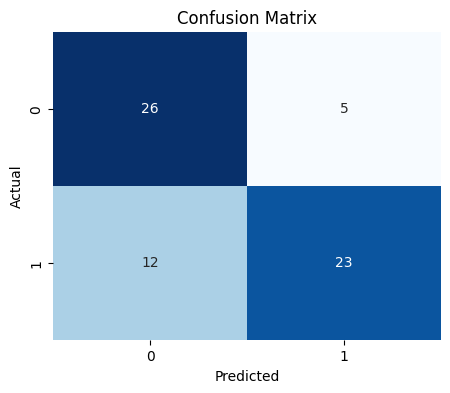


🔹 Cross-validation Results (5-fold):
   Mean Accuracy: 0.8625 ± 0.0468
   Mean F1_MACRO: 0.8622 ± 0.0468
💾 Model terbaik KNN disimpan sebagai './best_model/best_model_KNN.joblib'

🔍 Melakukan Grid Search untuk LogisticRegression ...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✅ Best params untuk LogisticRegression: {'C': 2.0, 'solver': 'lbfgs'}
✅ Best F1 score (CV): 0.8538

📊 Evaluasi LogisticRegression


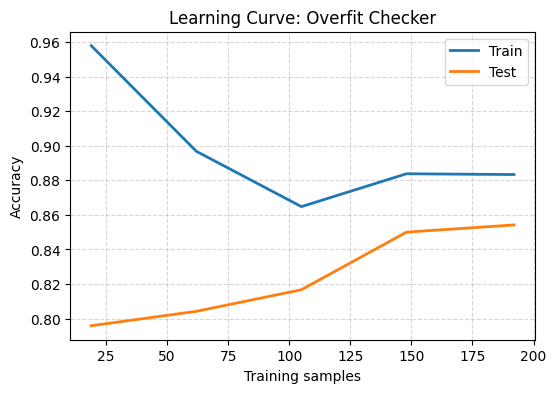

🔹 Classification Report:
              precision    recall  f1-score   support

           0      0.794     0.871     0.831        31
           1      0.875     0.800     0.836        35

    accuracy                          0.833        66
   macro avg      0.835     0.835     0.833        66
weighted avg      0.837     0.833     0.833        66

✅ Accuracy: 0.8333
✅ F1 Score (macro): 0.8333
✅ F1 Score (weighted): 0.8334


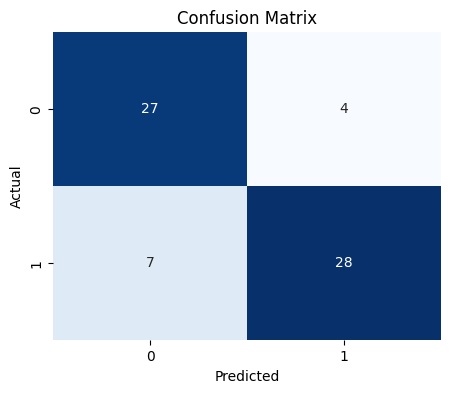


🔹 Cross-validation Results (5-fold):
   Mean Accuracy: 0.8542 ± 0.0349
   Mean F1_MACRO: 0.8538 ± 0.0350
💾 Model terbaik LogisticRegression disimpan sebagai './best_model/best_model_LogisticRegression.joblib'

🔍 Melakukan Grid Search untuk XGB ...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
✅ Best params untuk XGB: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
✅ Best F1 score (CV): 0.8956

📊 Evaluasi XGB


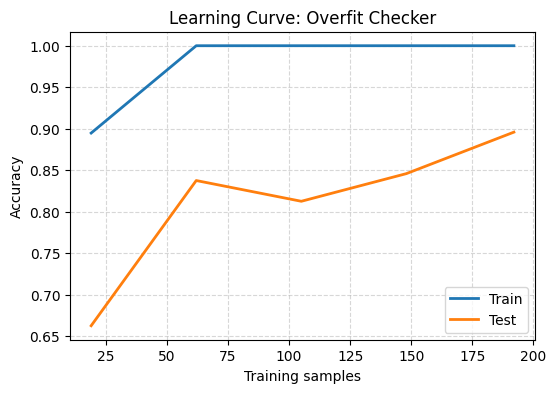

🔹 Classification Report:
              precision    recall  f1-score   support

           0      0.806     0.806     0.806        31
           1      0.829     0.829     0.829        35

    accuracy                          0.818        66
   macro avg      0.818     0.818     0.818        66
weighted avg      0.818     0.818     0.818        66

✅ Accuracy: 0.8182
✅ F1 Score (macro): 0.8175
✅ F1 Score (weighted): 0.8182


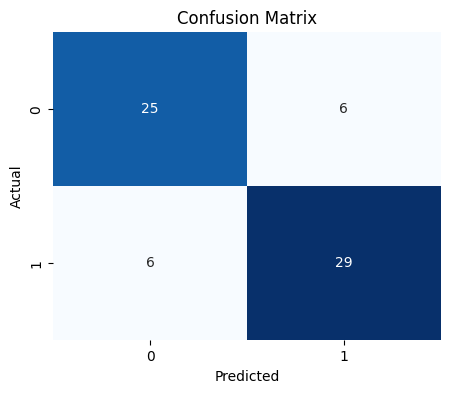


🔹 Cross-validation Results (5-fold):
   Mean Accuracy: 0.8792 ± 0.0610
   Mean F1_MACRO: 0.8787 ± 0.0614
💾 Model terbaik XGB disimpan sebagai './best_model/best_model_XGB.joblib'

🏆 Model terbaik keseluruhan:
XGB dengan skor F1 (CV): 0.8956
Disimpan sebagai: best_model_XGB.joblib


In [824]:
models = {
        "RandomForest": BalancedRandomForestClassifier(random_state=42),
        "KNN": KNeighborsClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
        "XGB": XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, n_jobs=-1)
}

param_grids = {
        "RandomForest": {
            'n_estimators': [200, 300, 400],
            'max_depth': [6, 8, 10],
            'bootstrap': [False],
            'min_samples_split': [6, 8, 10],
            'min_samples_leaf': [3, 4, 5],
            'max_features': ['sqrt', 'log2']
        },
        "KNN": {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean']
        },
        "LogisticRegression": {
            'solver': ['lbfgs', 'liblinear'],
            'C': [0.5, 1.0, 2.0]
        },
        "XGB": {
            'n_estimators': [200, 300, 400],
            'learning_rate': [0.03, 0.05, 0.1],
            'max_depth': [4, 5, 6],
            'subsample': [0.7, 0.8, 0.9],
            'colsample_bytree': [0.7, 0.8, 0.9]
        }
    }


# jalankan grid search di semua model
best_models, best_scores = grid_search_all_models(models, param_grids, X_train_res, y_train_res, X_test, y_test)
